In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=50):
        self.lr = learning_rate
        self.n_iters = n_iters
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1]) # initialize slope and intercept
        self.costs_ = [] 
        
        for _ in range(self.n_iters):
            y_predict = self.net_input(X)
            errors = y-y_predict # calculate errors of target and predict value
            
            dw1 = np.dot(X.T, errors) 
            dw0 = np.sum(errors) 
            
            self.w_[1:] += self.lr*dw1 # calculate slope by derivative
            self.w_[0] += self.lr*dw0 # calculate intercept by derivative
            
            cost = (errors**2).sum()/X.shape[0] # calculate the cost function
            self.costs_.append(cost)
        return self
            
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # calculate the predict value of given data
        
    def predict(self, X):
        return self.net_input(X)
    
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2) # calculate the minimum square error
    
    def r2_score(self, y_true, y_pred): # r2 score of target and predict value
        corr_matrix = np.corrcoef(y_true, y_pred)
        corr = corr_matrix[0, 1]
        return corr**2

In [3]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4) # generate or get sample dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) # split the dataset into train and test

In [4]:
linear_regression = LinearRegression(learning_rate=0.001, n_iters=50)
linear_regression.fit(X_train, y_train) # train data fit in model
predictions = linear_regression.predict(X_test) # predict the test dataset

print('Slope: %f' % linear_regression.w_[1])
print('Intercept: %f' % linear_regression.w_[0])

print('Minimum square error: ', linear_regression.mse(y_test, predictions))
print('Accuracy: ', linear_regression.r2_score(y_test, predictions)*100)

Slope: 71.826817
Intercept: -0.282451
Minimum square error:  339.4452428031099
Accuracy:  96.3535599278153


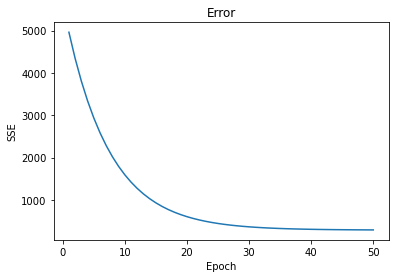

In [5]:
plt.plot(range(1, linear_regression.n_iters+1), linear_regression.costs_)
plt.title('Error')
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.show()

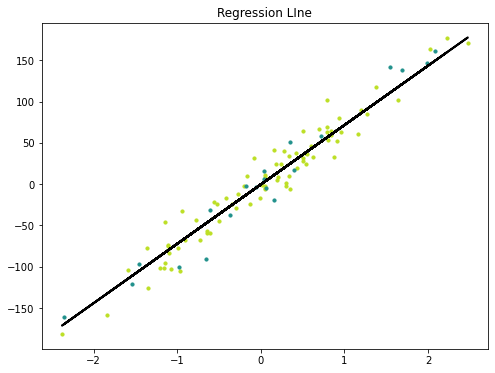

In [6]:
y_pred = linear_regression.predict(X)
cmap = plt.get_cmap("viridis")
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.title('Regression LIne')
plt.plot(X, y_pred, color="black", linewidth=2, label="Prediction")
plt.show()